## Preprocesing, Feature Engineering and Modeling

## Import Libriaries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score, mean_squared_log_error
%matplotlib inline

pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_columns', 1000) 
pd.set_option('display.width', 1000)

In [39]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

## Load Clean Data

In [40]:
train = pd.read_csv('../datasets/train_clean.csv',keep_default_na=False)
kaggle = pd.read_csv('../datasets/kaggle_clean.csv',keep_default_na=False)

In [41]:
train.drop(['Unnamed: 0'], axis=1,inplace=True)
kaggle.drop(['Unnamed: 0'], axis=1,inplace=True)

In [42]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape land_contour utilities lot_config land_slope neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  garage_area garage_qual garage_cond paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice
0  109  533352170           60        RL          70.0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe        Norm      1Fam      2Story             6             8        1976            2005      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0         Gd         TA     CBlock        TA        TA            No            GLQ         533.0            Unf           0.0        192.0          725.0    GasA         Ex           Y      SBrkr         725         754                0         1479             0.0             0.0          2          1              3              1           Gd              6        Typ           0           NA      Attchd         1976.0           RFn          2.0        475.0          TA          TA           Y             0             44               0           0             0          0      NA    NA           NA         0        3     2010       WD      130500
1  544  531379050           60        RL          43.0     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm        Norm      1Fam      2Story             7             5        1996            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace         132.0         Gd         TA      PConc        Gd        TA            No            GLQ         637.0            Unf           0.0        276.0          913.0    GasA         Ex           Y      SBrkr         913        1209                0         2122             1.0             0.0          2          1              4              1           Gd              8        Typ           1           TA      Attchd         1997.0           RFn          2.0        559.0          TA          TA           Y             0             74               0           0             0          0      NA    NA           NA         0        4     2009       WD      220000
2  153  535304180           20        RL          68.0      7922   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl        NAmes        Norm        Norm      1Fam      1Story             5             7        1953            2007      Gable   CompShg      VinylSd      VinylSd         None           0.0         TA         Gd     CBlock        TA        TA            No            GLQ         731.0            Unf           0.0        326.0         1057.0    GasA         TA           Y      SBrkr        1057           0                0         1057             1.0             0.0          1          0              3              1           Gd              5        Typ           0           NA      Detchd         1953.0           Unf          1.0        246.0          TA          TA           Y             0             52               0           0             0          0      NA    NA           NA         0        1     2010       WD      109000
3  318  916386060           60        RL          73.0      9802   Pave    NA       

In [43]:
kaggle.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape land_contour utilities lot_config land_slope neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  garage_area garage_qual garage_cond paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type
0  2658  902301120          190        RM          69.0      9142   Pave  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown        Norm        Norm    2fmCon      2Story             6             8        1910            1950      Gable   CompShg      AsbShng      AsbShng         None           0.0         TA         Fa      Stone        Fa        TA            No            Unf             0            Unf             0         1020           1020    GasA         Gd           N      FuseP         908        1020                0         1928               0               0          2          0              4              2           Fa              9        Typ           0           NA      Detchd         1910.0           Unf            1          440          Po          Po           Y             0             60             112           0             0          0      NA    NA           NA         0        4     2006       WD 
1  2718  905108090           90        RL          75.0      9662   Pave    NA       IR1          Lvl    AllPub     Inside        Gtl       Sawyer        Norm        Norm    Duplex      1Story             5             4        1977            1977      Gable   CompShg      Plywood      Plywood         None           0.0         TA         TA     CBlock        Gd        TA            No            Unf             0            Unf             0         1967           1967    GasA         TA           Y      SBrkr        1967           0                0         1967               0               0          2          0              6              2           TA             10        Typ           0           NA      Attchd         1977.0           Fin            2          580          TA          TA           Y           170              0               0           0             0          0      NA    NA           NA         0        8     2006       WD 
2  2414  528218130           60        RL          58.0     17104   Pave    NA       IR1          Lvl    AllPub     Inside        Gtl      Gilbert        Norm        Norm      1Fam      2Story             7             5        2006            2006      Gable   CompShg      VinylSd      VinylSd         None           0.0         Gd         TA      PConc        Gd        Gd            Av            GLQ           554            Unf             0          100            654    GasA         Ex           Y      SBrkr         664         832                0         1496               1               0          2          1              3              1           Gd              7        Typ           1           Gd      Attchd         2006.0           RFn            2          426          TA          TA           Y           100             24               0           0             0          0      NA    NA           NA         0        9     2006       New
3  1989  902207150           30        RM          60.0      8520   Pave    NA       Reg          Lvl    AllPub     Inside   

In [44]:
train.shape

(2047, 81)

## Preprocessing and Feature engineering

For feature engineering I decided to merge 2 datasets so that not to do the same work twice and avoid mistakes.

In [45]:
#add new column with train/test identifier
train['train_test'] = 'train'
kaggle['train_test'] = 'test'

In [46]:
df = pd.concat([train,kaggle],ignore_index=True,sort=False)
#df.drop(['saleprice'], axis=1,inplace=True)
df.shape

(2926, 82)

In [47]:
df.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley lot_shape land_contour utilities lot_config land_slope neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces fireplace_qu garage_type  garage_yr_blt garage_finish  garage_cars  garage_area garage_qual garage_cond paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  yr_sold sale_type  saleprice train_test
0  109  533352170           60        RL          70.0     13517   Pave    NA       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe        Norm      1Fam      2Story             6             8        1976            2005      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0         Gd         TA     CBlock        TA        TA            No            GLQ         533.0            Unf           0.0        192.0          725.0    GasA         Ex           Y      SBrkr         725         754                0         1479             0.0             0.0          2          1              3              1           Gd              6        Typ           0           NA      Attchd         1976.0           RFn          2.0        475.0          TA          TA           Y             0             44               0           0             0          0      NA    NA           NA         0        3     2010       WD    130500.0      train
1  544  531379050           60        RL          43.0     11492   Pave    NA       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm        Norm      1Fam      2Story             7             5        1996            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace         132.0         Gd         TA      PConc        Gd        TA            No            GLQ         637.0            Unf           0.0        276.0          913.0    GasA         Ex           Y      SBrkr         913        1209                0         2122             1.0             0.0          2          1              4              1           Gd              8        Typ           1           TA      Attchd         1997.0           RFn          2.0        559.0          TA          TA           Y             0             74               0           0             0          0      NA    NA           NA         0        4     2009       WD    220000.0      train
2  153  535304180           20        RL          68.0      7922   Pave    NA       Reg          Lvl    AllPub     Inside        Gtl        NAmes        Norm        Norm      1Fam      1Story             5             7        1953            2007      Gable   CompShg      VinylSd      VinylSd         None           0.0         TA         Gd     CBlock        TA        TA            No            GLQ         731.0            Unf           0.0        326.0         1057.0    GasA         TA           Y      SBrkr        1057           0                0         1057             1.0             0.0          1          0              3              1           Gd              5        Typ           0           NA      Detchd         1953.0           Unf          1.0        246.0          TA          TA           Y             0             52               0           0             0          0      NA    NA           NA         0        1     2010       WD    109000.0      train
3  318  916386060           60        RL

Create 'features' DataFrame to collect all features

In [48]:
features = pd.DataFrame()
#copy train/testidentifierfor splitting  Features dataframe later
features['train_test'] = df['train_test']
#copy saleprice for Y
features['saleprice'] = df['saleprice']

In [49]:
features.shape

(2926, 2)

#### There are 3 types of features : numeric, level-categorical and categirical

#### Numeric features (descrete and continuos)

Consalidate some numeric values:

In [50]:
# Total number of bathrooms
features['total_bath'] = df['bsmt_full_bath'] + (0.5 * df['bsmt_half_bath']) + df['full_bath'] + (0.5 * df['half_bath'])
# Total SF for house 
features['total_sq_feet'] = df['gr_liv_area'] + df['total_bsmt_sf']
# Total SF for 1st + 2nd floors
features['total_flr'] = df['1st_flr_sf'] + df['2nd_flr_sf']
# Total SF for porch
features['total_sq_porch'] = df['open_porch_sf'] + df['enclosed_porch'] + df['3ssn_porch'] + df['screen_porch']

Use log transformation for skewed values:

In [51]:
features['lot_area'] = (np.log(df['lot_area']))
features['total_sq_feet'] = np.log(features['total_sq_feet'])
features['total_flr'] = np.log(features['total_flr'])
features['gr_liv_area']= np.log(np.log(df['gr_liv_area']))

Add other numeric features:

In [52]:
#features['bedroom_abvgr'] = df['bedroom_abvgr']
features['age'] = 2019 - df[['year_built','year_remod/add']].max(axis=1)
features['year_remod/add'] = df['year_remod/add']
features['garage_cars'] = df['garage_cars']
features['fireplaces'] = df['fireplaces']


#### Categorical ordinal features

In [53]:
cols = ['bsmt_qual','bsmt_cond','fireplace_qu','garage_qual',
        'garage_cond','pool_qc','exter_cond','exter_qual','heating_qc','kitchen_qual']
rank = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}

for x in cols:
    features[x] = df[x].map(lambda x: rank.get(x, x))

In [54]:
features['lot_shape'] = df['lot_shape'].replace({'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4})
features['utilities'] = df['utilities'].replace({'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4})
features['land_slope'] = df['land_slope'].replace({'Sev' : 1, 'Mod' : 2, 'Gtl' : 3})
features['bsmt_exposure'] = df['bsmt_exposure'].replace({'No' : 0,'NA' : 0, 'Mn' : 1, 'Av': 2, 'Gd' : 3})
features['bsmtfin_type_1'] = df['bsmtfin_type_1'].replace({'NA' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 
                                         'ALQ' : 5, 'GLQ' : 6})
features['bsmtfin_type_2'] = df['bsmtfin_type_2'].replace({'NA' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 
                                         'ALQ' : 5, 'GLQ' : 6})
features['functional'] = df['functional'].replace({'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5, 
                                       'Min2' : 6, 'Min1' : 7, 'Typ' : 8})
features['paved_drive'] = df['paved_drive'].replace({'N' : 0, 'P' : 1, 'Y' : 2})
features['fence'] = df['fence'].replace({'NA' : 0, 'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4})

In [55]:
features['overall_qual'] = df['overall_qual']
features['overall_cond'] = df['overall_cond']

#### Categorical nominal features

All categitocal nominal features transform using one-hot encoding

In [56]:
def convert_to_dummies(columns):
    df_dummies = pd.get_dummies(df[columns].astype(str))
    return df_dummies

In [57]:
dummies = convert_to_dummies(['ms_subclass','mo_sold','neighborhood', 'street','ms_zoning',
                              'condition_1','condition_2','electrical','bldg_type'
                             ])
features = features.join(dummies)

#### Correlations between features

To remove noisy or multi-collinear features check correlation between features:

In [58]:
corr = features.corr()
cols = features[features.columns[~features.columns.isin(['train_test','saleprice'])]].columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        i_feat = cols[i];
        j_feat = cols[j];
        if corr[i_feat][j_feat] > 0.8:
            print((i_feat, j_feat, corr[i_feat][j_feat]))

('total_sq_feet', 'total_flr', 0.8554979447087235)
('total_sq_feet', 'gr_liv_area', 0.8577418147852657)
('total_flr', 'gr_liv_area', 0.9948899217284003)
('fireplaces', 'fireplace_qu', 0.8611016939632782)
('garage_qual', 'garage_cond', 0.9466657561920876)
('ms_subclass_190', 'bldg_type_2fmCon', 0.9751197658387686)
('ms_subclass_90', 'bldg_type_Duplex', 1.0)
('neighborhood_Somerst', 'ms_zoning_FV', 0.867152090262715)


In [59]:
del_columns = ['total_flr','garage_cond','bldg_type_2fmCon','bldg_type_Duplex','kitchen_qual','exter_qual','bldg_type_2fmCon',
              'ms_zoning_FV','fireplace_qu','garage_cond']
features.drop(del_columns, axis=1,inplace=True)

**Additional features**

In [60]:
corr = features.corr()
corr.sort_values(['saleprice'], ascending = False, inplace = True)
print(corr['saleprice'][:15])

saleprice               1.000000
overall_qual            0.803751
total_sq_feet           0.773055
gr_liv_area             0.695602
garage_cars             0.648294
total_bath              0.632453
bsmt_qual               0.613092
year_remod/add          0.550432
fireplaces              0.473088
heating_qc              0.458723
neighborhood_NridgHt    0.449118
bsmt_exposure           0.413756
lot_area                0.368785
ms_subclass_60          0.356779
bsmtfin_type_1          0.350748
Name: saleprice, dtype: float64


In [61]:
poly = PolynomialFeatures(include_bias=False)

In [62]:
transform_columns = features[['overall_qual','total_sq_feet','total_bath','bsmt_qual','gr_liv_area','garage_cars','fireplaces']]
features_poly = poly.fit_transform(transform_columns)
l = poly.get_feature_names(transform_columns.columns) 
f = pd.DataFrame(features_poly, columns = l)
f.drop(['total_bath', 'total_sq_feet', 'gr_liv_area', 'garage_cars', 'fireplaces', 'bsmt_qual', 'overall_qual'],axis=1,inplace=True)

In [63]:
features = features.join(f) 

**Divide features dataset to train and kaggle:**

In [64]:
kaggle_features = features[features['train_test']=='test']

In [65]:
kaggle_features.drop(['train_test'], axis=1,inplace=True)
kaggle_features.drop(['saleprice'], axis=1,inplace=True)

In [66]:
train_features = features[features['train_test']=='train']

In [67]:
train_features.drop(['train_test'], axis=1,inplace=True)

## Model Prep: Create our features matrix (X) and target vector (y)

In [68]:
X = train_features.drop(['saleprice'], axis=1)
y = train_features['saleprice']

## Model Prep: Train/test split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12,test_size=0.3)

In [70]:
X_train.shape

(1432, 144)

In [71]:
X_test.shape

(615, 144)

## Model Prep: Power Transformation and Scaling

In [72]:
y_test_pt = y_test.map(np.log)
y_train_pt = y_train.map(np.log)

In [73]:
ss = StandardScaler()
ss.fit(X_train) #learning x_bar and std for all columns
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

## Model Prep: Instantiate our models

In [74]:
lr = LinearRegression()

In [75]:
lasso = LassoCV(cv =5)

In [76]:
ridge = RidgeCV(cv=5)

### Cross validation

In [77]:
cross_val_score(lr, X_train_sc, y_train_pt, cv=5).mean()

-4.4569186631116914e+24

In [78]:
cross_val_score(lasso, X_train_sc, y_train_pt, cv=5).mean()

0.9017313405229004

In [79]:
cross_val_score(ridge, X_train_sc, y_train_pt, cv=5).mean()

0.8999775769185028

### Model Fitting and Evaluation

Lasso cross validation score is better than others, I'll use Lasso regression model

In [80]:
lasso.fit(X_train_sc, y_train_pt)
lasso.score(X_train_sc, y_train_pt)

0.9211078156255531

In [81]:
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

Lasso picked 80 features and eliminated the other 64 features


In [82]:
lasso.score(X_test_sc, y_test_pt)

0.9152737871013319

In [83]:
pred = lasso.predict(X_test_sc)
residuals = y_test_pt - pred

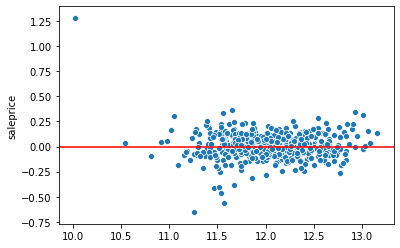

In [84]:
sns.scatterplot(pred, residuals)
plt.axhline(0,color='red');

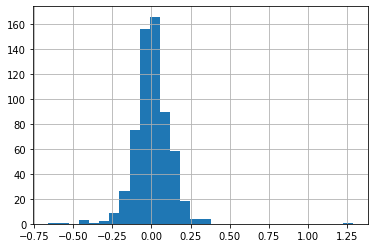

In [85]:
residuals.hist(bins=30);

### True and predicted values

In [86]:
X_sc = ss.transform(X)
predictions = lasso.predict(X_sc) 
predictions = np.exp(predictions)

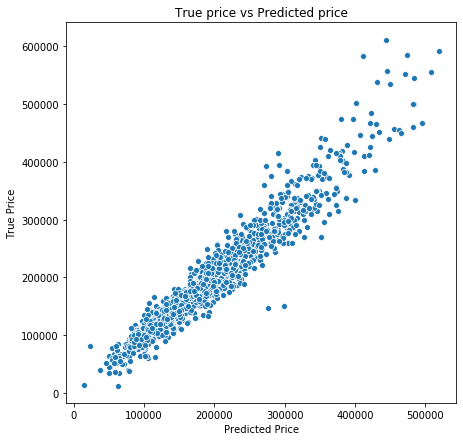

In [87]:
plt.figure(figsize=(7,7))
# Generate a scatterplot of predicted values versus actual values.
sns.scatterplot(predictions, y)
plt.xlabel('Predicted Price')
plt.ylabel('True Price')
plt.title('True price vs Predicted price');

Save data for Tableau visualization

In [88]:
dd = pd.DataFrame() 

In [89]:
dd['Predicted Price']= predictions
dd['True Price'] = y

In [90]:
dd.to_csv('../datasets/tableau.csv', index=False)

## Kaggle submission 

Predict Sale price on test data

In [91]:
X_kaggle = kaggle_features
X_kaggle = ss.transform(X_kaggle) #Scaling X 
preds = lasso.predict(X_kaggle) 
preds = np.exp(preds)

In [92]:
X_kaggle.shape

(879, 144)

In [93]:
#create data frame for submission 
sub = pd.DataFrame ({'id': kaggle['id'], 'SalePrice': preds})

In [94]:
sub.to_csv('../datasets/kaggle_sub.csv', index=False)

## Model Evaluation

In [95]:
def metrics (y,predictions):
    residuals = y - predictions
    print('Mean Absolute Error',mean_absolute_error(y,predictions))
    print('Residual Sum of Squares',(residuals**2).sum())
    print('Mean Squared Error is',mean_squared_error(y,predictions))
    print('Root Mean Squared Error is',np.sqrt(mean_squared_error(y,predictions)))
    print('R2 Score is',r2_score(y,predictions))

In [96]:
metrics(y,predictions)

Mean Absolute Error 13854.633951690792
Residual Sum of Squares 895206084784.3679
Mean Squared Error is 437325884.1154704
Root Mean Squared Error is 20912.338083425067
R2 Score is 0.930413767725591


The R2 for both the train and test data are very similar and around 0.92. It's pretty high and it indicates a model with low bias and low variance.

## Conclusions

The model with the highest r2 score is LASSO regression model with 80 features. The RMSE for this model was $20,912. The most likely predictors of house price are square footage of a house and overall quality.

### Nest steps

Learn and use other types of models and techniques to improve the metrics of predictions